In [134]:
# Importação de Bibliotecas
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import plotly.express as px

In [38]:
# Leitura de Dados no formato .CSV
df_consumo = pd.read_csv(r"dataset_Kaggle.csv", delimiter=';', encoding='ANSI')
df_consumo.head() # primeiros 5 registros

,id,safra_abertura,cidade,estado,idade,sexo,limite_total,limite_disp,data,valor,grupo_estabelecimento,cidade_estabelecimento,pais_estabelecimento
0,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,5605,4.12.2019,31,SERVICO,SAO PAULO,BR
1,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,5343,9.11.2019,"150,01",FARMACIAS,SANTOS,BR
2,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,2829,6.05.2019,50,SERVICO,SAO PAULO,BR
3,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,2547,1.06.2019,"54,4",M.O.T.O.,OSASCO,BR
4,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,2515,1.06.2019,"32,79",M.O.T.O.,OSASCO,BR


In [87]:
df_servico=df_consumo[['idade','grupo_estabelecimento']]
df_servico

,idade,grupo_estabelecimento
0,37,SERVICO
1,37,FARMACIAS
2,37,SERVICO
3,37,M.O.T.O.
4,37,M.O.T.O.
...,...,...
4950,37,RESTAURANTE
4951,37,SUPERMERCADOS
4952,37,RESTAURANTE
4953,37,SERVICO


In [40]:
df_servico.idade.unique()

array([37, 47, 35, 53, 27, 32, 44, 36, 34, 20, 39, 28, 33, 29, 43, 31, 30,
       45, 51, 42], dtype=int64)

In [24]:
df_servico.idade.describe()

count    4955.000000
mean       34.115439
std         6.803725
min        20.000000
25%        28.000000
50%        33.000000
75%        37.000000
max        53.000000
Name: idade, dtype: float64

In [25]:
df_servico.idade.count()

4955

In [53]:
a=df_servico.query('grupo_estabelecimento == "SERVICO" and idade == 37')
b=df_servico.query('grupo_estabelecimento == "AGENCIA DE TUR" and idade == 37')
c=df_servico.query('grupo_estabelecimento == "ARTIGOS ELETRO" and idade == 37')

In [55]:
df_servico.query('grupo_estabelecimento == "SERVICO" and idade == 37')

,idade,grupo_estabelecimento
0,37,SERVICO
2,37,SERVICO
6,37,SERVICO
12,37,SERVICO
15,37,SERVICO
...,...,...
4945,37,SERVICO
4947,37,SERVICO
4948,37,SERVICO
4949,37,SERVICO


In [56]:
df_servico.query('grupo_estabelecimento == "AGENCIA DE TUR" and idade == 37')

,idade,grupo_estabelecimento
4931,37,AGENCIA DE TUR


In [54]:
idade_consumo = pd.concat([a, b, c])
idade_consumo.head()

,idade,grupo_estabelecimento
0,37,SERVICO
2,37,SERVICO
6,37,SERVICO
12,37,SERVICO
15,37,SERVICO


In [45]:
df_servico.grupo_estabelecimento.unique()

array(['SERVICO', 'FARMACIAS', 'M.O.T.O.', 'ARTIGOS ELETRO', 'VAREJO',
       'LOJA DE DEPART', 'VESTUARIO', 'MOVEIS E DECOR', 'HOSP E CLINICA',
       'SEM RAMO', 'SUPERMERCADOS', 'RESTAURANTE', 'MAT CONSTRUCAO',
       'POSTO DE GAS', 'CIA AEREAS', 'JOALHERIA', 'TRANS FINANC',
       'AGENCIA DE TUR', 'AUTO PECAS', 'HOTEIS', 'INEXISTENTE',
       'ALUG DE CARROS'], dtype=object)

In [64]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [65]:
state_encoder = LabelEncoder()
state_encoder.fit(df_servico['grupo_estabelecimento'].unique())
df_servico['grupo_estabelecimento'] = state_encoder.transform(df_servico['grupo_estabelecimento'])
df_servico['grupo_estabelecimento'].unique()

<ipython-input-65-3d7ae03b2cbc>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([17,  5, 11,  2, 20, 10, 21, 13,  6, 16, 18, 15, 12, 14,  4,  9, 19,
        0,  3,  7,  8,  1])

In [71]:
df_novo_consumo=df_servico[['grupo_estabelecimento']]
df_novo_consumo

,grupo_estabelecimento
0,17
1,5
2,17
3,11
4,11
...,...
4950,15
4951,18
4952,15
4953,17


Text(0.5, 1.0, 'Faixa Salarial')

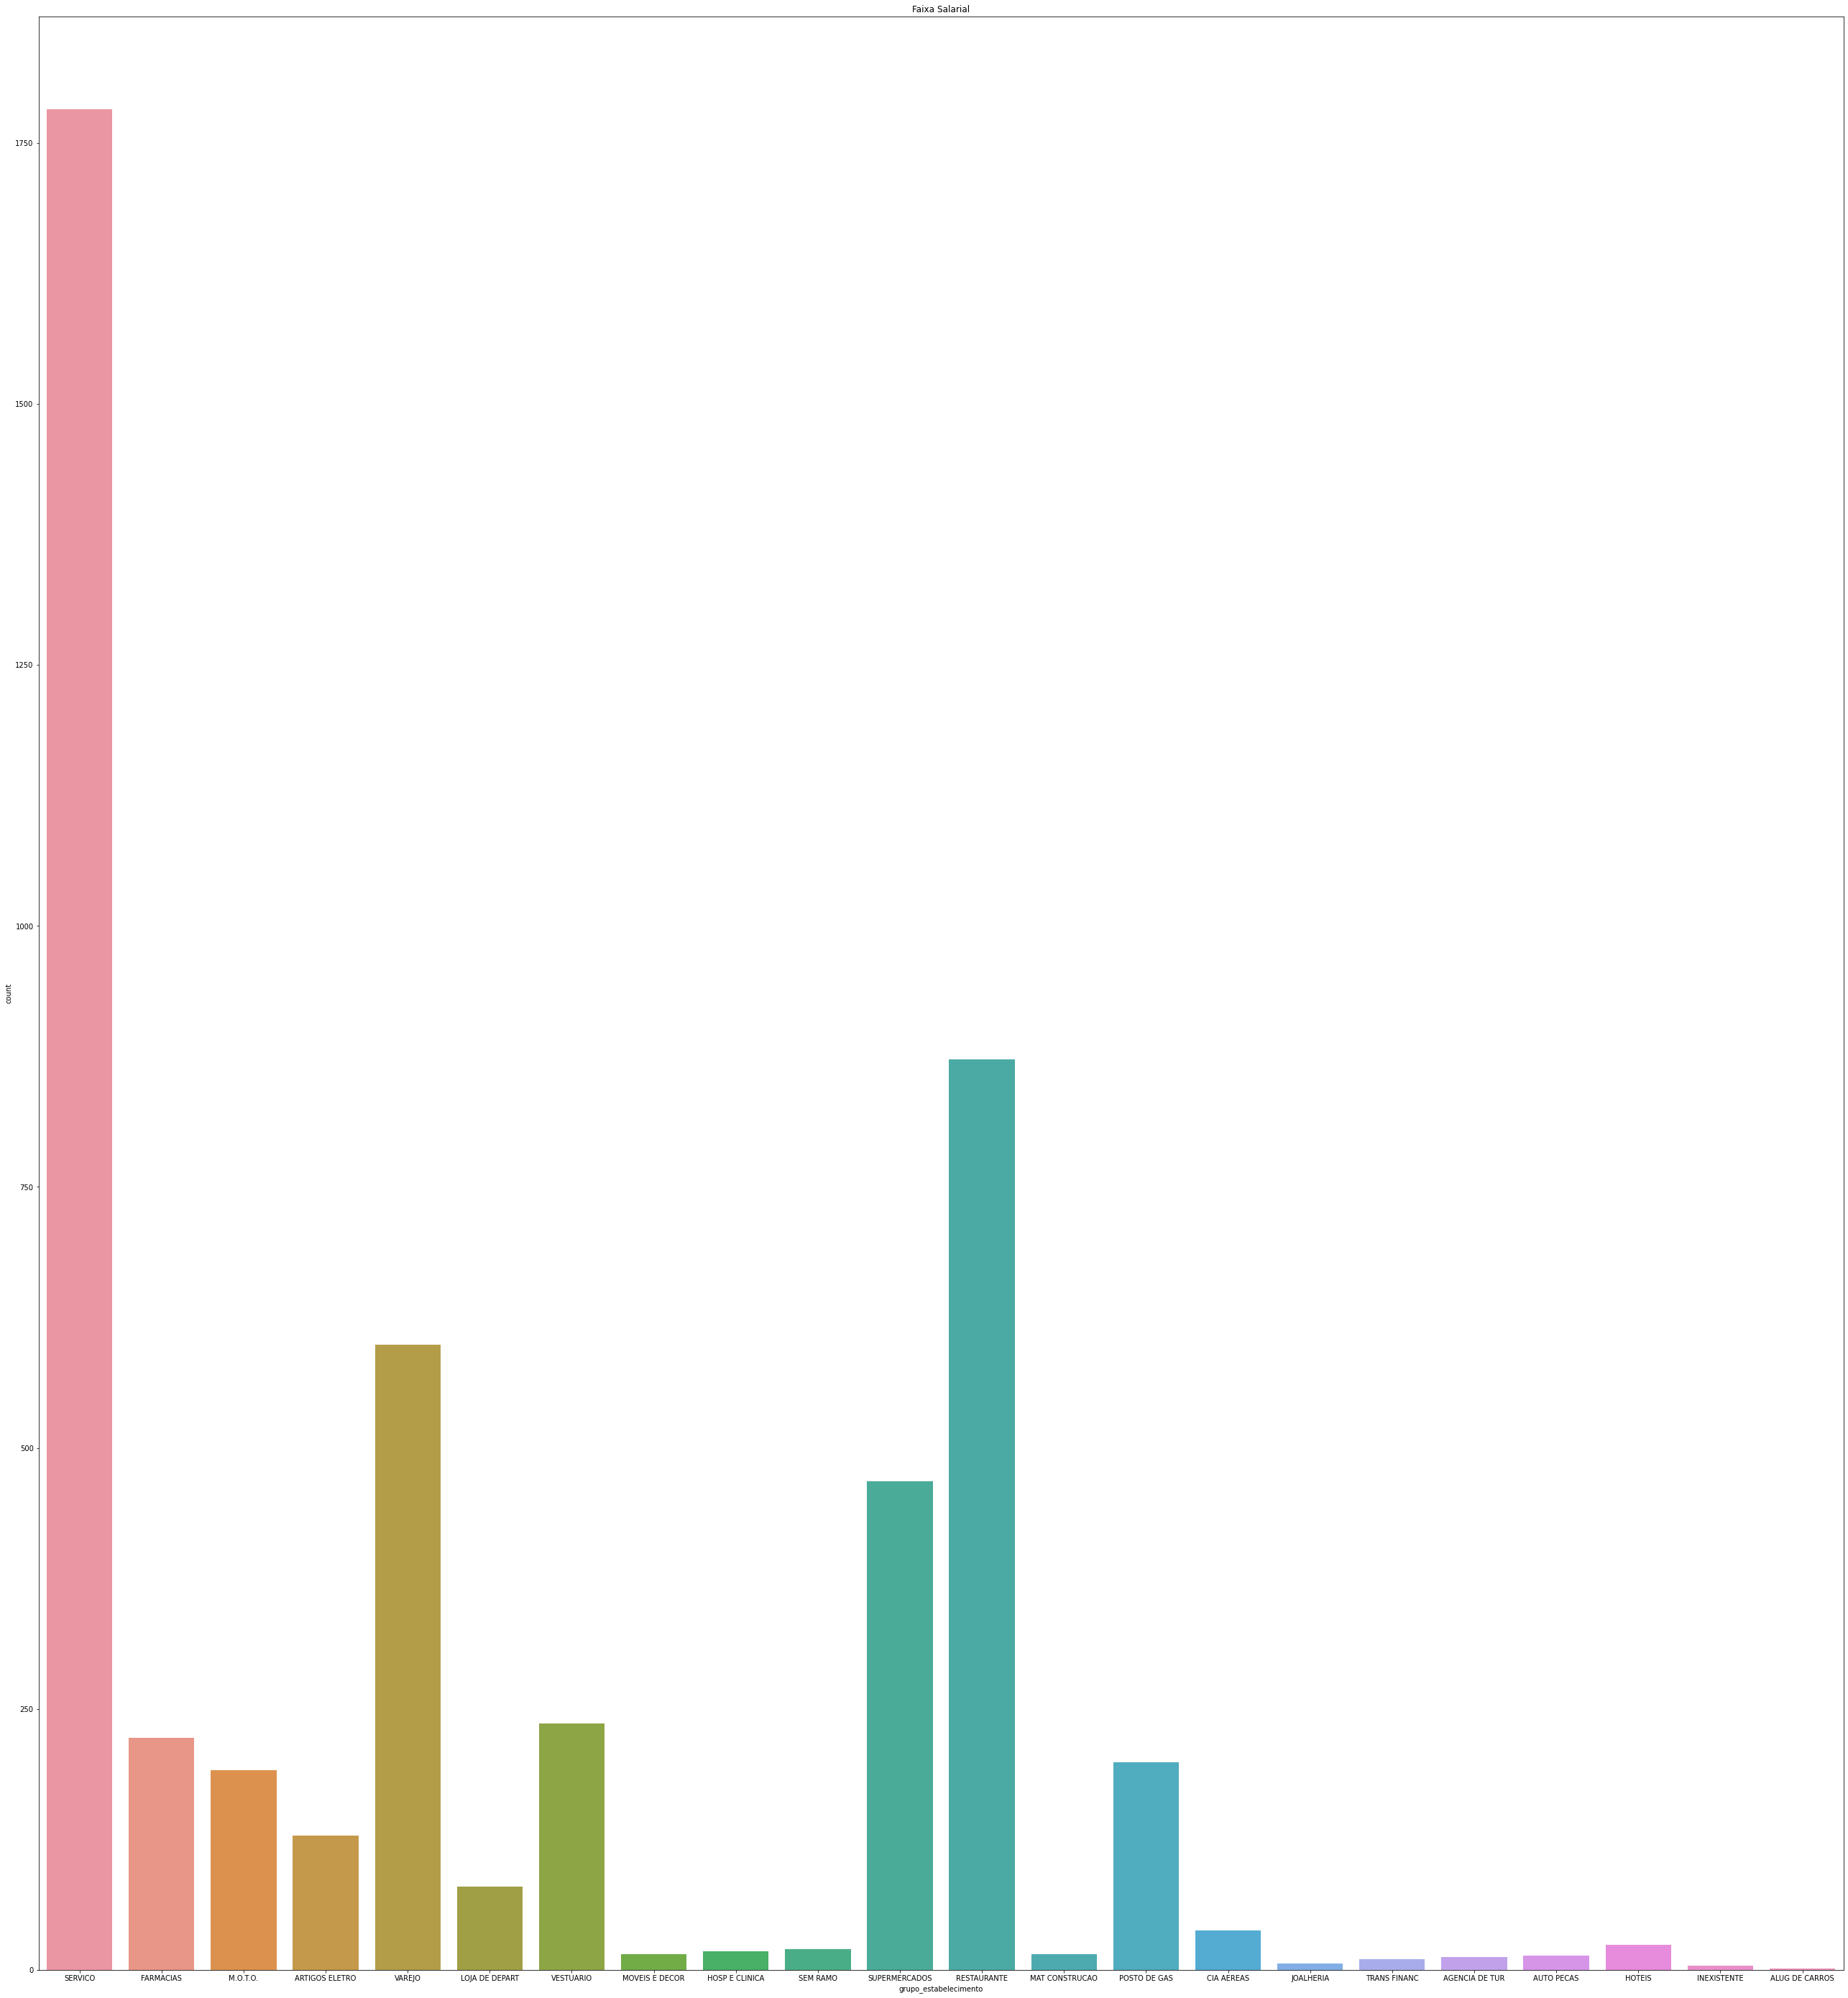

In [85]:
plt.rcParams["figure.figsize"] = [45,50]
sns.countplot(x='grupo_estabelecimento', data=df_servico)
plt.title("Faixa Salarial")

<AxesSubplot:xlabel='idade'>

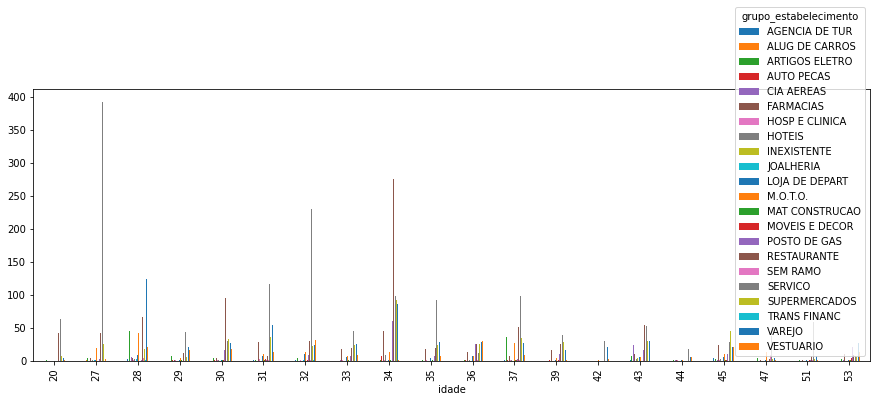

In [95]:
df_servico.groupby(['idade','grupo_estabelecimento']).size().unstack(1).fillna(0).plot(kind='bar',figsize=(15,5))

<AxesSubplot:xlabel='grupo_estabelecimento'>

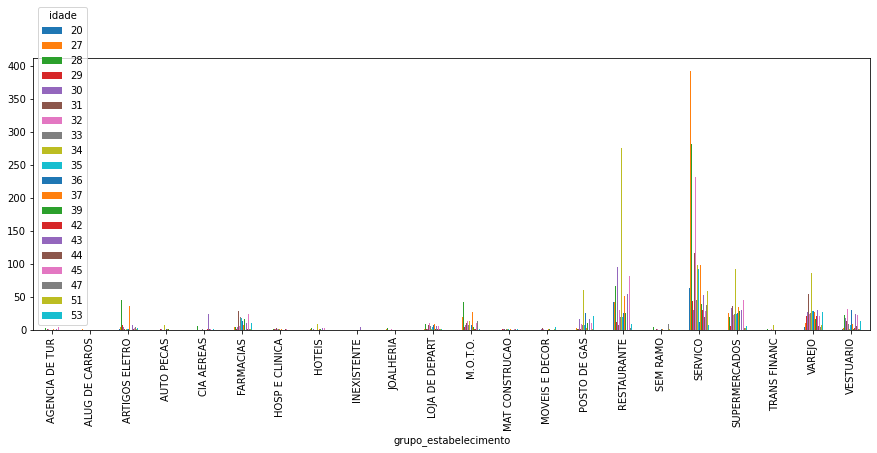

In [96]:
df_servico.groupby(['grupo_estabelecimento','idade']).size().unstack(1).fillna(0).plot(kind='bar',figsize=(15,5))

In [107]:
grupo_consumo=df_servico.groupby(['grupo_estabelecimento'])
len(grupo_consumo.groups)
# 22 serviços existentes

22

In [117]:
df_servico

,idade,grupo_estabelecimento
0,37,SERVICO
1,37,FARMACIAS
2,37,SERVICO
3,37,M.O.T.O.
4,37,M.O.T.O.
...,...,...
4950,37,RESTAURANTE
4951,37,SUPERMERCADOS
4952,37,RESTAURANTE
4953,37,SERVICO


In [ ]:
df_servico.plot.bar(x='grupo_estabelecimento',y='idade', rot=0)

In [108]:
grupo_consumo.size()

grupo_estabelecimento
AGENCIA DE TUR      12
ALUG DE CARROS       1
ARTIGOS ELETRO     129
AUTO PECAS          14
CIA AEREAS          38
FARMACIAS          222
HOSP E CLINICA      18
HOTEIS              24
INEXISTENTE          4
JOALHERIA            6
LOJA DE DEPART      80
M.O.T.O.           191
MAT CONSTRUCAO      15
MOVEIS E DECOR      15
POSTO DE GAS       199
RESTAURANTE        872
SEM RAMO            20
SERVICO           1782
SUPERMERCADOS      468
TRANS FINANC        10
VAREJO             599
VESTUARIO          236
dtype: int64

In [109]:
grupo_idade=df_servico.groupby(['idade'])
len(grupo_idade.groups)

20

In [110]:
grupo_idade.size()

idade
20    119
27    510
28    642
29    118
30    246
31    289
32    395
33    169
34    701
35    209
36    184
37    312
39    150
42     59
43    271
44     39
45    268
47     81
51     86
53    107
dtype: int64